In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
LABEL_MAP_NAME = 'label_map.pbtxt'
paths = {'CHECKPOINT_PATH': os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME),
        'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export', 'checkpoint'),
        'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
        'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
        'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME)}

files = {'PIPELINE_CONFIG': os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
        'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)}

In [3]:
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [4]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

In [5]:
# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-26')).expect_partial() ##ckpt-22 ##ckpt-26 ##ckpt-24

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [6]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [8]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'evaluate', 'IMG_1712474277712.jpg')

Two: 2
One: 2
Total objects detected: 4
Total amount of change : Rs. 6


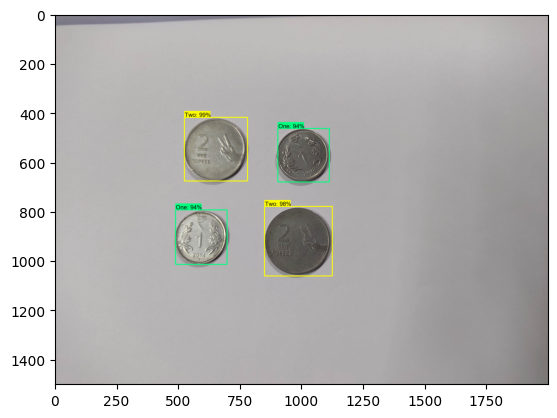

In [9]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

# Initialize a dictionary to store the counts of each detected class
object_counts = {}
total = 0

# Iterate over the detected classes
for detection_class, detection_score in zip(detections['detection_classes'], detections['detection_scores']):
    if detection_score > 0.8:
    # Get the label name corresponding to the class ID
        label_name = category_index[detection_class + 1]['name']
        if label_name == 'One':
            total = total + 1
        elif label_name == 'Two':
            total = total + 2
        elif label_name == 'Five':
            total = total + 5
        elif label_name == 'Ten':
            total = total + 10
        # Update the count for the current label
        object_counts[label_name] = object_counts.get(label_name, 0) + 1

# Print the total number of objects detected along with their label names
for label_name, count in object_counts.items():
    print(f"{label_name}: {count}")

# Total number of objects detected
total_objects_detected = sum(object_counts.values())
print(f"Total objects detected: {total_objects_detected}")
print("Total amount of change : Rs.",total)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()